### 1. Un entorno de anaconda con los paquetes necesarios.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Usando sclicing con NumPy separar los datos en 2 datasets: 
#entrenamiento(80 %) y validaci´on y pruebas(20 %).


In [23]:
dataset = np.load('proyecto_training_data.npy')

In [24]:
dataset

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [25]:
dataset.shape

(1460, 6)

In [26]:
dataset = np.array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03, 6.50000e+01],
                [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03, 8.00000e+01],
                [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03, 6.80000e+01],
                [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03, 6.60000e+01],
                [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03, 6.80000e+01],
                [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03, 7.50000e+01]])

### separar el dataset

In [27]:
subset80 = dataset [:80]
subset20 = dataset [-20:]

In [28]:
training = pd.DataFrame(subset80)

In [29]:
training.columns = ["Y", "X1", "X2", "X3", "X4", "X5"]

### 3. Analisis exploratorio de datos: Para cada variable en el dataset calcular¶
#((usando numpy o pandas): #media #valor m´aximo #valor m´ınimo #rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1) #desviaci´on est´andar.

In [74]:
summary = df.describe()

In [75]:
peak_to_peak = summary.loc[['max', 'min']].apply(lambda x: x[0] - x[1])
summary.loc['peak_to_peak'] = peak_to_peak

In [76]:
print(summary)

                       colA      colB         colC      colD         colE  \
count              6.000000  6.000000     6.000000  6.000000     6.000000   
mean          194937.500000  6.166667  1093.333333  6.666667  1972.666667   
std            47625.606952  0.983192   173.480450  1.505545    25.726769   
min           142125.000000  5.000000   856.000000  5.000000  1941.000000   
25%           156000.000000  5.250000   959.500000  6.000000  1953.750000   
50%           195000.000000  6.500000  1133.000000  6.000000  1970.500000   
75%           219750.000000  7.000000  1239.000000  7.500000  1994.750000   
max           266500.000000  7.000000  1262.000000  9.000000  2003.000000   
peak_to_peak  124375.000000  2.000000   406.000000  4.000000    62.000000   

                   colF  
count          6.000000  
mean          70.333333  
std            5.887841  
min           65.000000  
25%           66.500000  
50%           68.000000  
75%           73.250000  
max           80.0000

### Exploratorio

In [30]:
for i in training.columns:
    print (i)
    print (training[i].describe())
    print (f"peak to peak", np.ptp(training[i]))

Y
count         6.000000
mean     194937.500000
std       47625.606952
min      142125.000000
25%      156000.000000
50%      195000.000000
75%      219750.000000
max      266500.000000
Name: Y, dtype: float64
peak to peak 124375.0
X1
count    6.000000
mean     6.166667
std      0.983192
min      5.000000
25%      5.250000
50%      6.500000
75%      7.000000
max      7.000000
Name: X1, dtype: float64
peak to peak 2.0
X2
count       6.000000
mean     1093.333333
std       173.480450
min       856.000000
25%       959.500000
50%      1133.000000
75%      1239.000000
max      1262.000000
Name: X2, dtype: float64
peak to peak 406.0
X3
count    6.000000
mean     6.666667
std      1.505545
min      5.000000
25%      6.000000
50%      6.000000
75%      7.500000
max      9.000000
Name: X3, dtype: float64
peak to peak 4.0
X4
count       6.000000
mean     1972.666667
std        25.726769
min      1941.000000
25%      1953.750000
50%      1970.500000
75%      1994.750000
max      2003.000000
Name

### 4. Para cada variable en el dataset usar seaborn(funci´on distplot https://seaborn.pydata.¶
org/generated/seaborn.distplot.html) para graficar un histograma

                       colA      colB         colC      colD         colE  \
count              6.000000  6.000000     6.000000  6.000000     6.000000   
mean          194937.500000  6.166667  1093.333333  6.666667  1972.666667   
std            47625.606952  0.983192   173.480450  1.505545    25.726769   
min           142125.000000  5.000000   856.000000  5.000000  1941.000000   
25%           156000.000000  5.250000   959.500000  6.000000  1953.750000   
50%           195000.000000  6.500000  1133.000000  6.000000  1970.500000   
75%           219750.000000  7.000000  1239.000000  7.500000  1994.750000   
max           266500.000000  7.000000  1262.000000  9.000000  2003.000000   
peak_to_peak  124375.000000  2.000000   406.000000  4.000000    62.000000   

                   colF  
count          6.000000  
mean          70.333333  
std            5.887841  
min           65.000000  
25%           66.500000  
50%           68.000000  
75%           73.250000  
max           80.0000

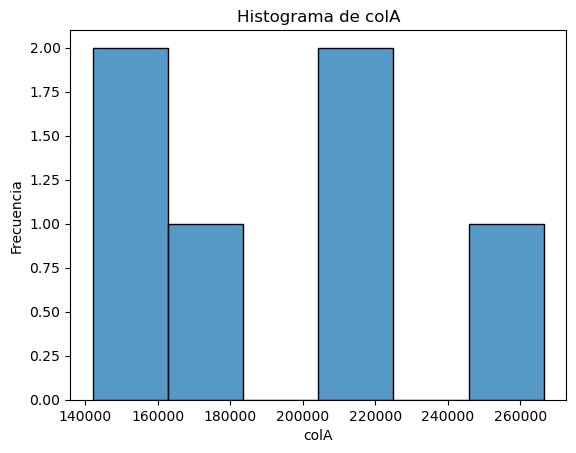

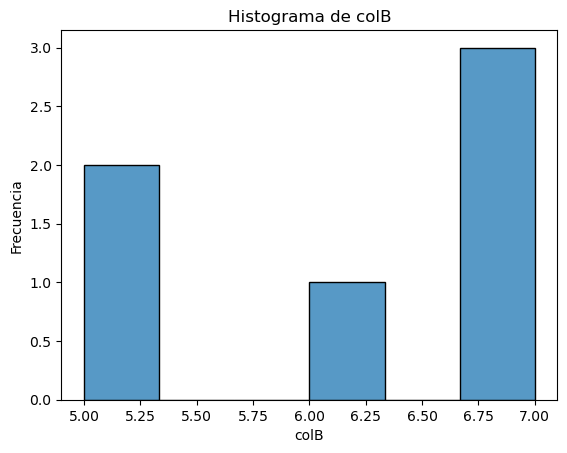

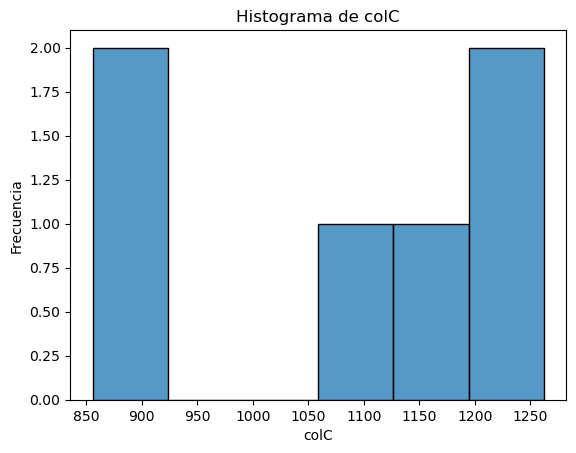

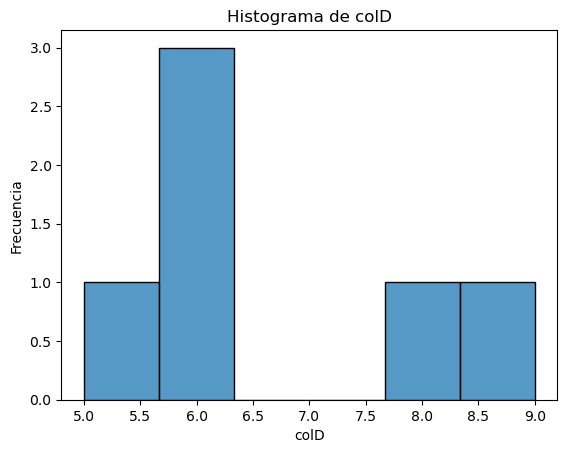

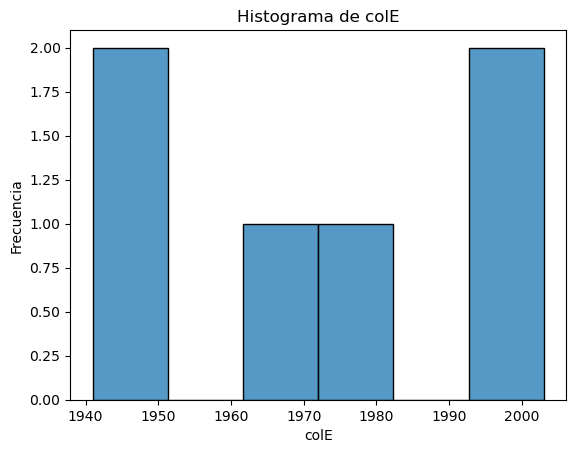

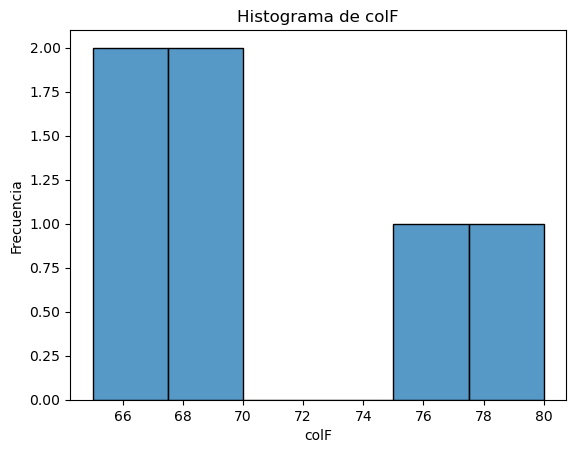

In [77]:
print(summary)
for column in df.columns:
    sns.histplot(df[column], kde=False, bins=6) 
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

### Histograma

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


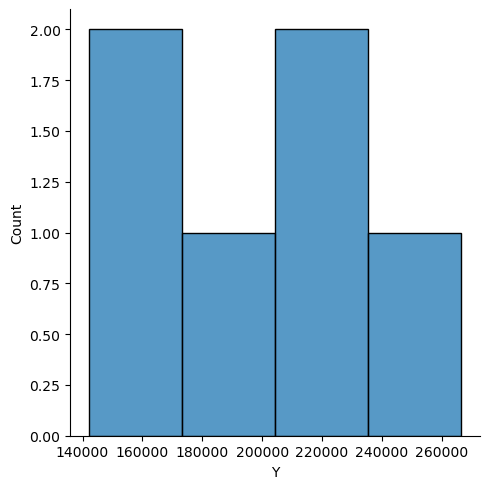

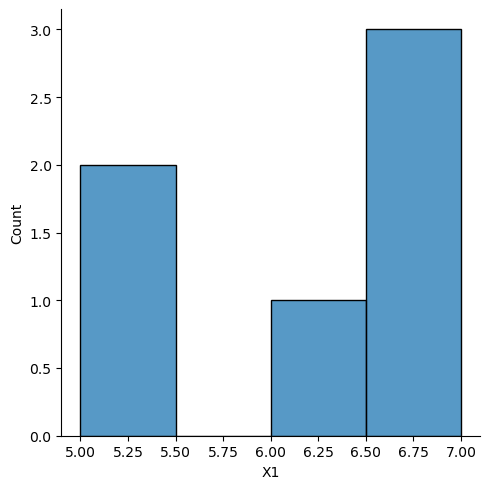

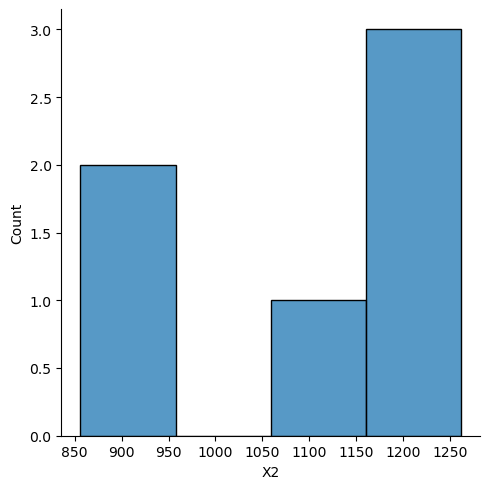

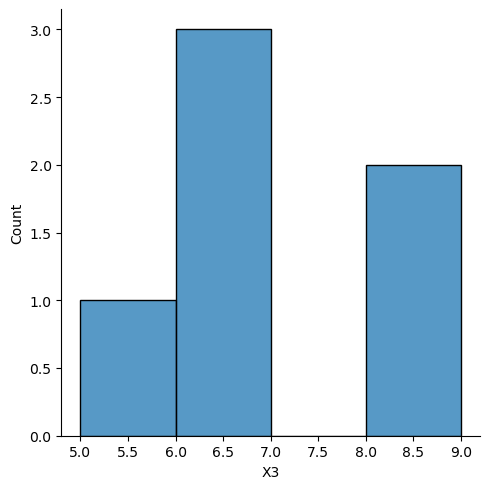

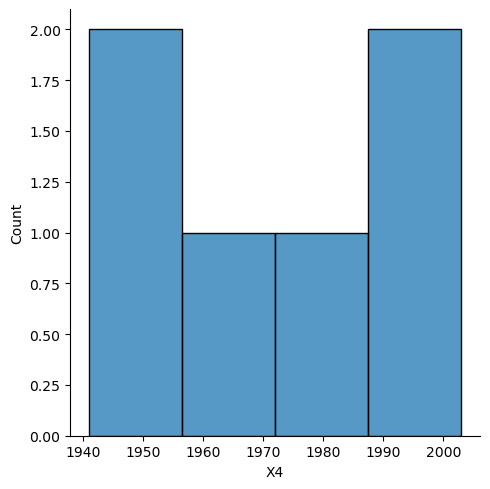

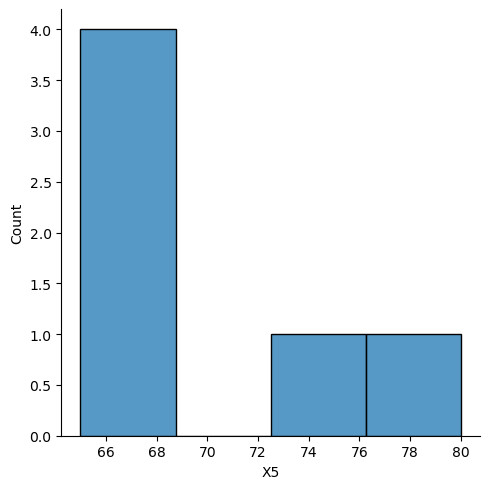

In [31]:
for i in training.columns:
    sns.displot(training[i])

### 5. Para cada variable independiente x :Calcular el coeficiente de correlaci´on entre x y y.Graficar x vs y(scatterplot) usando matplotlib.
Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.
Basado en la gr´afica y el coeficiente de correlaci´on de cada par x,y elegir las 2 variables
con m´as potencial predictivo es decir las 2 variables que presentan mayor correlaci´on
entre dicha variable y la variable dependiente.

In [78]:
df.head()

,colA,colB,colC,colD,colE,colF
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,266500.0,7.0,1188.0,9.0,1941.0,66.0
4,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [79]:
x = df.loc[:,["colA", "colC", "colE"]]
y = df.loc[:,["colB", "colD", "colF"]]
y.head()

,colB,colD,colF
0,7.0,8.0,65.0
1,6.0,6.0,80.0
2,7.0,6.0,68.0
3,7.0,9.0,66.0
4,5.0,5.0,68.0


In [80]:
x = df.loc[:,["colA", "colC", "colE"]]
y = df.loc[:,["colB", "colD", "colF"]]
x.head()

,colA,colC,colE
0,208500.0,856.0,2003.0
1,181500.0,1262.0,1976.0
2,223500.0,920.0,2001.0
3,266500.0,1188.0,1941.0
4,142125.0,1078.0,1950.0


In [81]:
correlations = {}
labels = {}

In [82]:
y.head()

,colB,colD,colF
0,7.0,8.0,65.0
1,6.0,6.0,80.0
2,7.0,6.0,68.0
3,7.0,9.0,66.0
4,5.0,5.0,68.0


In [83]:
x = df.loc[:,["colA", "colC", "colE"]]
y = df.loc[:,["colB", "colD", "colF"]]
x.head()

,colA,colC,colE
0,208500.0,856.0,2003.0
1,181500.0,1262.0,1976.0
2,223500.0,920.0,2001.0
3,266500.0,1188.0,1941.0
4,142125.0,1078.0,1950.0


In [84]:
np.corrcoef(x,y)

array([[ 1.        ,  0.99999908,  0.99999983,  0.99999727,  0.99999984,
         0.99999983, -0.50886165, -0.49583991, -0.48356321, -0.52154081,
        -0.49583991, -0.50662171],
       [ 0.99999908,  1.        ,  0.9999997 ,  0.99999952,  0.99999813,
         0.9999997 , -0.51003154, -0.4970201 , -0.48475278, -0.52270032,
        -0.4970201 , -0.50779339],
       [ 0.99999983,  0.9999997 ,  1.        ,  0.99999846,  0.99999933,
         1.        , -0.50936155, -0.49634421, -0.48407152, -0.52203628,
        -0.49634421, -0.50712238],
       [ 0.99999727,  0.99999952,  0.99999846,  1.        ,  0.99999577,
         0.99999847, -0.51087088, -0.49786684, -0.48560628, -0.52353219,
        -0.49786684, -0.50863402],
       [ 0.99999984,  0.99999813,  0.99999933,  0.99999577,  1.        ,
         0.99999933, -0.5083678 , -0.49534173, -0.48306108, -0.52105133,
        -0.49534173, -0.50612711],
       [ 0.99999983,  0.9999997 ,  1.        ,  0.99999847,  0.99999933,
         1.        , -

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


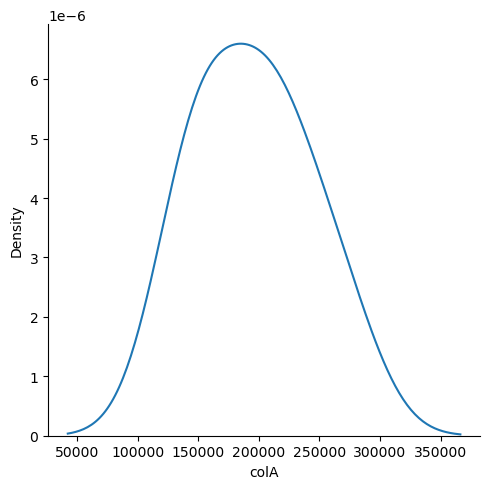

In [85]:
sns.displot (df, x= 'colA', kind = 'kde')
plt.show()

In [86]:
x.head()

,colA,colC,colE
0,208500.0,856.0,2003.0
1,181500.0,1262.0,1976.0
2,223500.0,920.0,2001.0
3,266500.0,1188.0,1941.0
4,142125.0,1078.0,1950.0


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


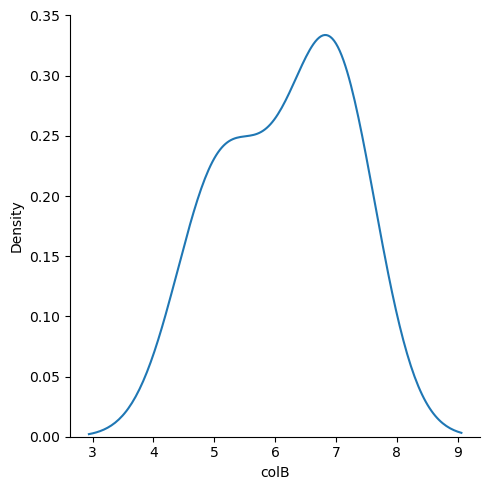

In [87]:
sns.displot (df, x= 'colB', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


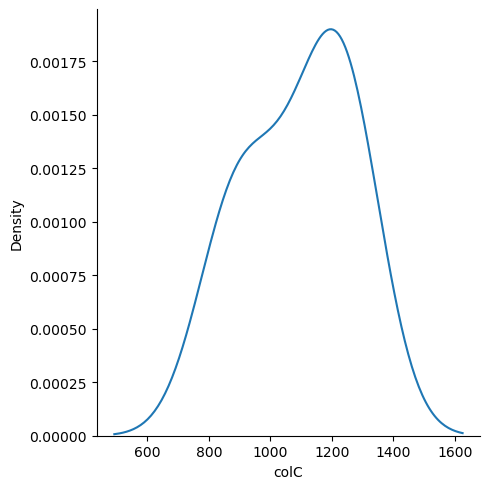

In [88]:
sns.displot (df, x= 'colC', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


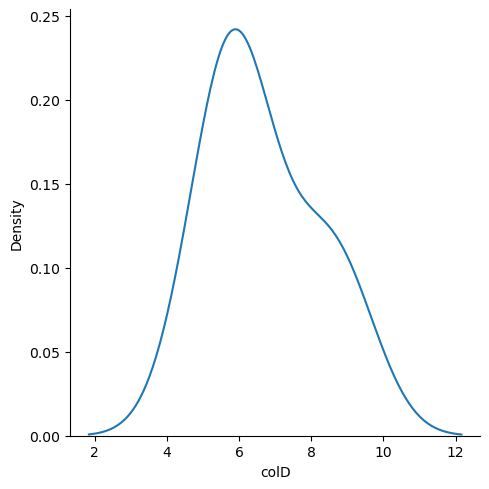

In [89]:
sns.displot (df, x= 'colD', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


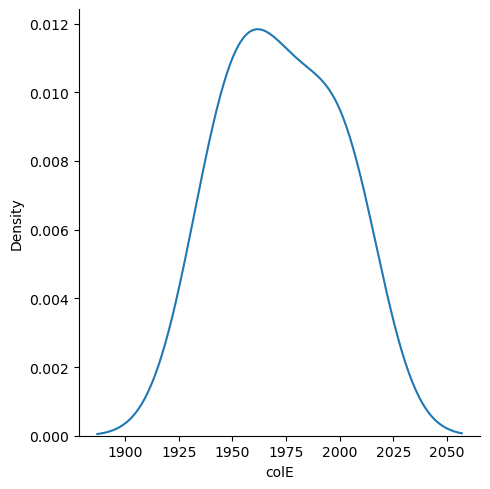

In [90]:
sns.displot (df, x= 'colE', kind = 'kde')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


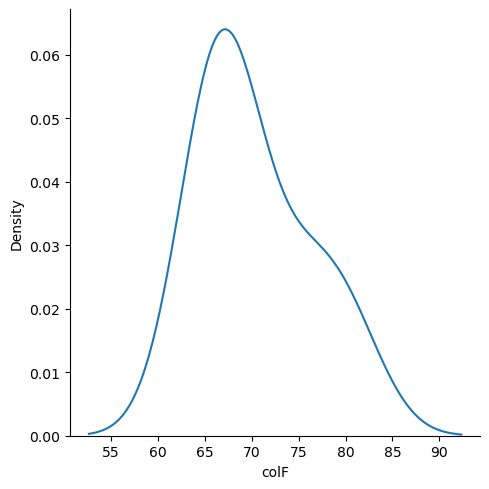

In [91]:
sns.displot (df, x= 'colF', kind = 'kde')
plt.show()

In [32]:
training.head()

,Y,X1,X2,X3,X4,X5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,266500.0,7.0,1188.0,9.0,1941.0,66.0
4,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [33]:
correlation = training.corrwith(training["Y"])

In [34]:
print (correlation)

Y     1.000000
X1    0.913772
X2   -0.255824
X3    0.821798
X4    0.076800
X5   -0.482950
dtype: float64


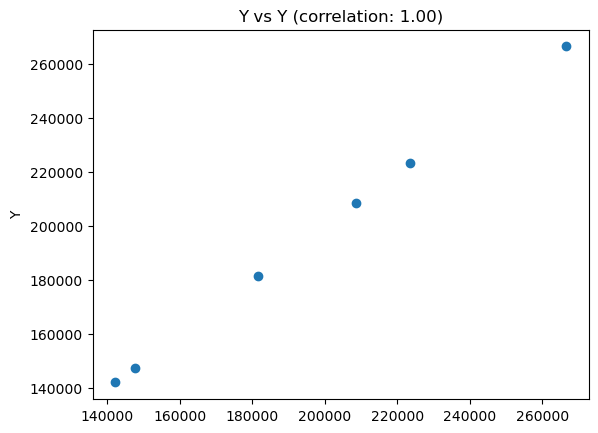

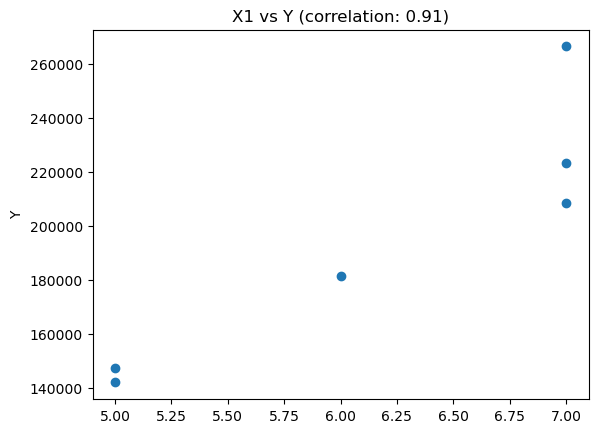

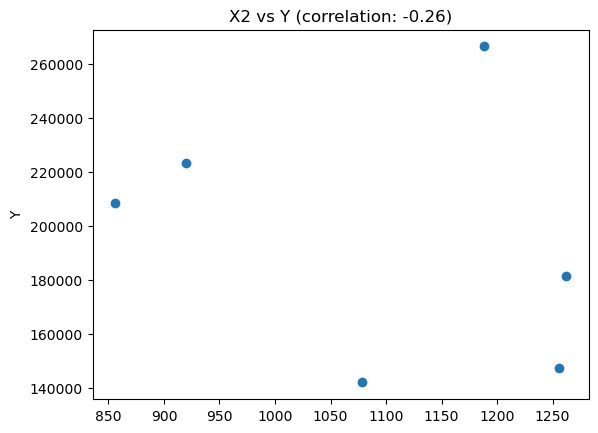

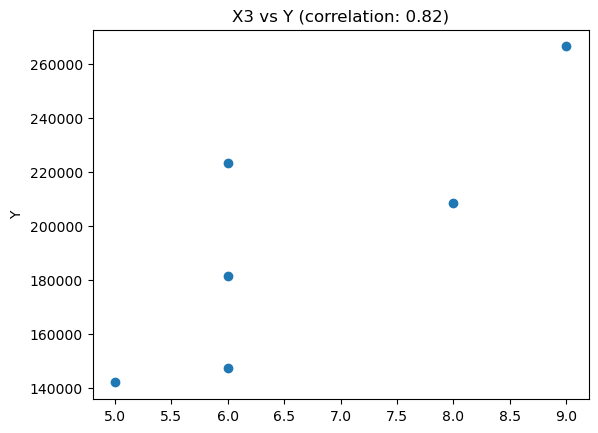

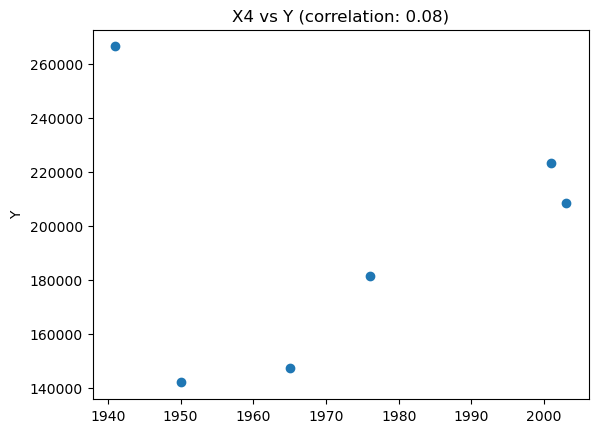

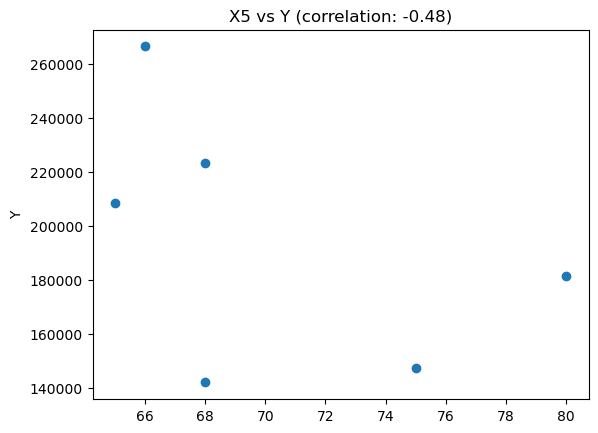

In [35]:
for i in training.columns:
    plt.scatter(training[i],training["Y"])
    plt.title(F"{i} vs Y (correlation: {correlation [i]:.2f})")
    plt.ylabel("Y")
    plt.show()

In [36]:
print (F"se eligen las 2 con mejor correlacion X1 y X3")

se eligen las 2 con mejor correlacion X1 y X3


### 6. Entrenar modelo de regresion lineal

In [126]:
y= training["Y"]
x1= training["X1"]
x3= training["X3"]

In [127]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):    
   
    beta0 = np.random.rand()
    beta1 = np.random.rand()
   
    m = len(x)
    
    for epoch in range(epochs):       
        y_pred = beta0 + beta1 * x
                
        error = np.mean((y_pred - y)**2)        
        
        beta0 -= alpha *(1/m) * np.sum(y_pred - y)
        beta1 -= alpha *(1/m) * np.sum((y_pred - y) * x)
             
        
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: Error= {error}")
    
    return beta0, beta1



In [128]:
beta0, beta1 = entrenar_regresion_lineal(x1, y, 
                                         epochs = 100, 
                                         imprimir_error_cada = 10, 
                                         alpha = 0.01 )

print("parametros entrenados:")
print("beta0:", beta0)
print("beta1:", beta1)


Iteración 0: Error= 39890550883.81453
Iteración 10: Error= 455627466.14744014
Iteración 20: Error= 453518907.85879374
Iteración 30: Error= 452946922.9117589
Iteración 40: Error= 452377307.61813194
Iteración 50: Error= 451809992.9556656
Iteración 60: Error= 451244969.62998915
Iteración 70: Error= 450682228.38658357
Iteración 80: Error= 450121760.0083075
Iteración 90: Error= 449563555.3152477
parametros entrenados:
beta0: 3276.7508398319446
beta1: 31346.854934869043


In [129]:
df = pd.DataFrame(dataset, columns=['colA', 'colB', 'colC', 'colD', 'colE', 'colF'])

In [130]:
print(df)

       colA  colB    colC  colD    colE  colF
0  208500.0   7.0   856.0   8.0  2003.0  65.0
1  181500.0   6.0  1262.0   6.0  1976.0  80.0
2  223500.0   7.0   920.0   6.0  2001.0  68.0
3  266500.0   7.0  1188.0   9.0  1941.0  66.0
4  142125.0   5.0  1078.0   5.0  1950.0  68.0
5  147500.0   5.0  1256.0   6.0  1965.0  75.0


In [131]:
df.columns

Index(['colA', 'colB', 'colC', 'colD', 'colE', 'colF'], dtype='object')

In [132]:
columnas = df.columns
for col in columnas:
    porcentaje_na = df [col].isnull().mean()
    print(f"{col}: {porcentaje_na}")

colA: 0.0
colB: 0.0
colC: 0.0
colD: 0.0
colE: 0.0
colF: 0.0


In [133]:
df.dtypes

colA    float64
colB    float64
colC    float64
colD    float64
colE    float64
colF    float64
dtype: object

In [134]:
from sklearn.model_selection import train_test_split


In [135]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=80)

In [136]:
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=80)

In [141]:
print("Forma de conjunto de entrenamiento:", X_train.shape)
print("Forma de conjunto de validación:", X_val.shape)
print("Forma de conjunto de prueba:", X_test.shape)


Forma de conjunto de entrenamiento: (3, 6)
Forma de conjunto de validación: (1, 6)
Forma de conjunto de prueba: (2, 6)


### 6. Crear una funci´on para entrenar un modelo de regresi´on lineal de una variable y = β0 +β1 ∗x.La funci´on recibe como argumentos:
6.1 Vector con la variable independiente x,
6.2 Vector con la variable dependiente y,
6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
imprimir a trav´es de print: el nu´mero de iteraci´on, el error del modelo en esa iteraci´on, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
10,20,30,40,50.
6.5 escalar α(learning rate): es usado como parte de la expresi´on matem´atica para actualizar
en cada iteraci´on los par´ametros del modelo.

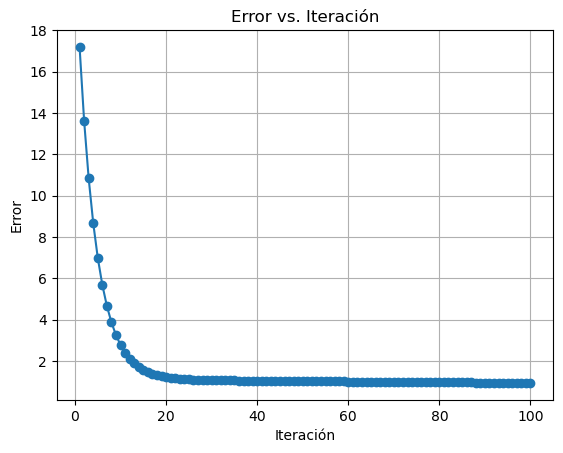

In [142]:
def graficar_error_vs_iteracion(errores):
    plt.plot(range(1, len(errores) + 1), errores, marker='o')
    plt.title("Error vs. Iteración")
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()

def graficar_modelos_evolutivos(modelos, intervalo_iteraciones):
    for iteracion, modelo in modelos.items():
        if (iteracion + 1) % intervalo_iteraciones == 0 or iteracion == len(modelos) - 1:
            beta0, beta1 = modelo
            plt.scatter(x, y, label='Datos')
            plt.plot(x, beta0 * x + beta1, color='red', label=f'Modelo (Iteración {iteracion + 1})')
            plt.title(f"Modelo (Iteración {iteracion + 1})")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend()
            plt.grid(True)
            plt.show()


# Graficar cómo cambia el error en el tiempo
graficar_error_vs_iteracion(errores_iteracion)




In [72]:
def combinar_predicciones(modelo_manual, modelo_scikit, x):
    # Predicciones con el modelo entrenado manualmente
    pred_manual = modelo_manual[0] * x + modelo_manual[1]
    
    # Predicciones con el modelo de scikit-learn
    pred_scikit = modelo_scikit.predict(x.reshape(-1, 1))
    
    # Combinación de las predicciones (promedio)
    pred_promedio = (pred_manual + pred_scikit) / 2
    
    return pred_manual, pred_scikit, pred_promedio

def calcular_error(predicciones, y):
    error = np.mean((predicciones - y) ** 2)
    return error

def graficar_error(x, errores_manual, errores_scikit):
    plt.plot(x, errores_manual, label='Error (Modelo Manual)')
    plt.plot(x, errores_scikit, label='Error (Modelo Scikit)')
    plt.title("Error de los Modelos")
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.legend()
    plt.grid(True)
    plt.show()

# Suponiendo que 'x_validacion' y 'y_validacion' son los datos de validación
def comparar_modelos(x_validacion, y_validacion, modelo_manual, modelo_scikit):
    # Predicciones combinadas
    pred_manual, pred_scikit, pred_promedio = combinar_predicciones(modelo_manual, modelo_scikit, x_validacion)
    
    # Calcular errores
    error_manual = calcular_error(pred_manual, y_validacion)
    error_scikit = calcular_error(pred_scikit, y_validacion)
    error_promedio = calcular_error(pred_promedio, y_validacion)
    
    # Graficar errores
    graficar_error(x_validacion, error_manual, error_scikit)
    
    # Comparar errores y concluir cuál modelo es mejor
    if error_manual < error_scikit:
        print("El modelo entrenado manualmente tiene un error más bajo.")
    elif error_manual > error_scikit:
        print("El modelo de scikit-learn tiene un error más bajo.")
    else:
        print("Ambos modelos tienen el mismo error.")

# Ejemplo de uso
# Suponiendo que 'x_validacion' y 'y_validacion' son los datos de validación y 'modelo_manual' y 'modelo_scikit' son los modelos entrenados manualmente y con scikit-learn, respectivamente
comparar_modelos(x_validacion, y_validacion, modelo_manual, modelo_scikit)


NameError: name 'x_validacion' is not defined